<a href="https://colab.research.google.com/github/soundarya1992/My-Projects/blob/master/salesrevenue_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**
This case study would help in understanding how advertisement spends done by a company for their 
product  has  helped  in  driving  their  Sales  Revenue  and  also  help  us  in  planning  the  future 
advertisement spends. We have two variables in this dataset,
AdSpends = The advertising expenditure (in thousands of dollars)
SalesRevenue = The sales revenue (in thousands of dollars)

**Problem**
Analyse  and  build  a  model  using  the  given  dataset  to  predict  the  Sales  Revenue  based  on  the 
advertisement expenditure.
Also provide explanation to all the below questions,
1.  Find the 5 point summary of the dataset.
2.  Plot the dataset to see how the data is distributed.
3.  Determine how the variables are related to each other. If there is any relation explain it.
4.  Build the linear regression model and interpret all the statistics obtained from the model. 
Also justify your conclusions about the model.
5.  Perform all the model diagnostics to check if all the assumptions are satisfied.
6.   Use the model built to predict for an AdSpend = 50


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('Sales Revenue data-dataset.csv')

**5 point summary**

In [111]:
data.describe()

,AdSpend,SalesRevenue
count,20.000000,20.000000
mean,32.250000,291.600000
std,5.734246,38.692308
min,25.000000,238.000000
25%,27.750000,261.750000
50%,31.000000,285.500000
75%,34.500000,312.500000
max,45.000000,371.000000


**Data distribution**

Text(0.5, 1.0, 'The Sales Revenue based on the advertisement expenditure')

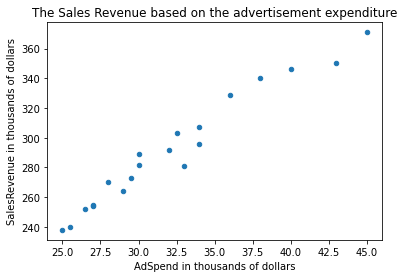

In [112]:
data.plot.scatter(x='AdSpend', y='SalesRevenue')
plt.xlabel('AdSpend in thousands of dollars')
plt.ylabel('SalesRevenue in thousands of dollars')
plt.title('The Sales Revenue based on the advertisement expenditure')

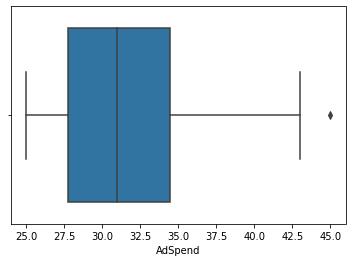

In [134]:
sns.boxplot(x=data['AdSpend'])

In [113]:
#Correlation
data.corr()

,AdSpend,SalesRevenue
AdSpend,1.000000,0.978282
SalesRevenue,0.978282,1.000000


We can see the relationship between x and y looks kind of linear. As in, we could probably draw a line somewhere diagonally from the bottom left of the plot to the top right to generally describe the relationship between the data.

This is a good indication that using linear regression might be appropriate for this little dataset.

In [0]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train the algorithm

In [151]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [153]:
print('Coefficient is', regressor.coef_)
print('Intercept is', regressor.intercept_)

Coefficient is [6.50478293]
Intercept is 82.67402501839587


In [154]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,371,375.389257
1,240,248.545990
2,238,245.293598
3,307,303.836645


The predicted revenue values are close to the actual ones.

In [120]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score 0.987095194367179
Mean Absolute Error: 5.848050036791761
Mean Squared Error: 38.87572696887352
Root Mean Squared Error: 6.235040253989827


Linear Regression using statsmodel

In [0]:
import statsmodels.api as sm
model = sm.OLS(data['SalesRevenue'], data['AdSpend']).fit()
model = sm.OLS(data['AdSpend'], sm.add_constant(data['SalesRevenue'])).fit()

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AdSpend   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     401.0
Date:                Sun, 10 May 2020   Prob (F-statistic):           9.44e-14
Time:                        13:44:12   Log-Likelihood:                -31.321
No. Observations:                  20   AIC:                             66.64
Df Residuals:                      18   BIC:                             68.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.0269      2.129     -4.710      0.000     -14.500      -5.554
SalesRevenue     0.1450      0.007     20.024      0.000       0.130       0.160
==============================================================================
Omnibus:                        0.541   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.600
Skew:                           0.318   Prob(JB):                        0.741
Kurtosis:                       2.438   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
print('Params',model.params)


Params const          -10.026915
SalesRevenue     0.144983
dtype: float64


In [125]:
print('Pvalue', model.pvalues)


Pvalue const           1.746340e-04
SalesRevenue    9.436382e-14
dtype: float64


In [126]:
print('R2', model.rsquared)

R2 0.9570357561406833


R-squared value is 0.957, which is close to 1. Model is fit well.
Adj R-Squared is 0.955 - features are relevant to one another.
F-stat is used for accessing the significance of the overall regression model. here we Reject null hyp and linear relationship exsists between the variables.

There are four **assumptions** associated with a linear regression model:

*Linearity*: The relationship between X and the mean of Y is linear 
*Homoscedasticity*: The variance of residual is the same for any value of X.
*Independence*: Observations are independent of each other.
*Normality*: For any fixed value of X, Y is normally distributed. Here we have only one independent variable. 

In [127]:
y_pred = results.predict(X_test)
y_pred, y_test

(array([405.72990174, 229.91361098, 225.40550096, 306.55148131]),
 array([371, 240, 238, 307]))

In [128]:
residual = y_test - y_pred
residual

array([-34.72990174,  10.08638902,  12.59449904,   0.44851869])

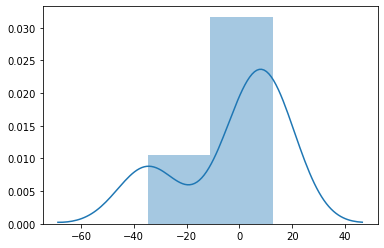

In [129]:
import seaborn as sns
sns.distplot(residual)

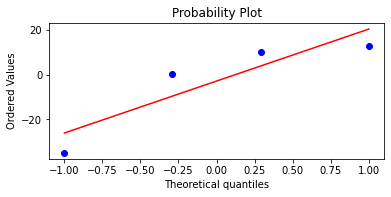

In [130]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [131]:
np.mean(residual) #not a near model distribution

-2.900123749613364

Text(0, 0.5, 'Sales Revenue')

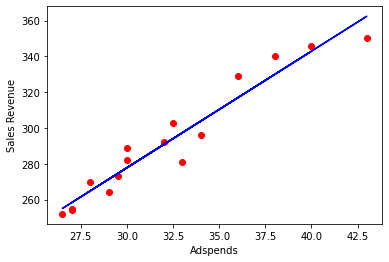

In [136]:
# Visualising the Train set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Adspends')
plt.ylabel('Sales Revenue')

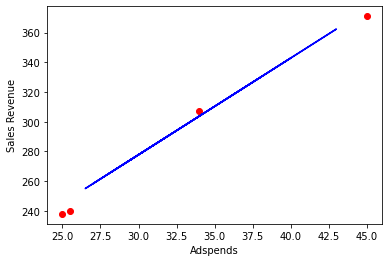

In [135]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Adspends')
plt.ylabel('Sales Revenue')
plt.show()

Using the model built to predict for an AdSpend = 50

In [137]:
def new_pred(a):
  a = [a]
  a = np.array(a) # convert to a numpy array
  a = np.expand_dims(a, 0) # change shape from (8,) to (1,8)
  pred = regressor.predict(a) # voila!
  print("The predicted sales revenue is ", pred)

new_pred(int(input("Enter the advertisement expense ")))

Enter the advertisement expense 50
The predicted sales revenue is  [407.91317145]
